In [30]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, exp, pi
from scipy.stats import norm
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

## 3.1 線形基底関数モデル

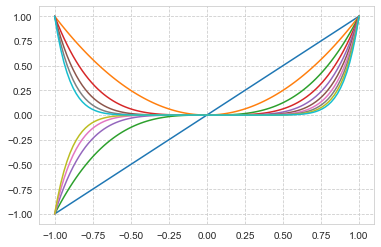

In [31]:
# 基底関数：多項式
y = 0
x = np.linspace(-1, 1, 100)
for i in range(1, 11):
    y = x**i
    plt.plot(x, y)

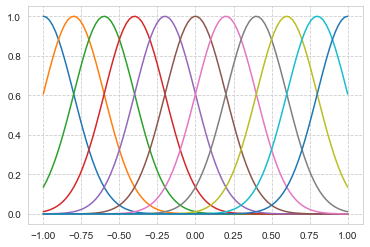

In [32]:
# 基底関数：ガウス基底関数
y = 0
x = np.linspace(-1, 1, 100)
for mu in np.linspace(-1, 1, 11):
    y = exp(-(x-mu)**2/ (2*(0.2)**2))
    plt.plot(x, y)


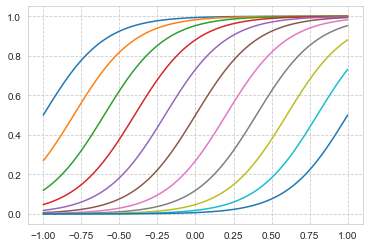

In [33]:
# 基底関数：シグモイド関数
for mu in np.linspace(-1, 1, 11):
    y = 1 / (1+exp(-((x-mu) / 0.2)))
    plt.plot(x, y)

## 3.2 バイアス-バリアンス分解

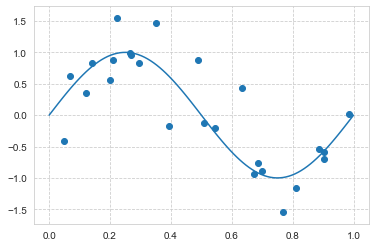

In [34]:
N = 25
L = 100
M = 25
x_array= np.random.rand(L, N)
t_array = sin(2*pi*x_array)+np.random.normal(0, 0.5, (L, N))
x_r = np.linspace(0, 1, 100)
t_r = sin(2*pi*x_r)
plt.plot(x_r, t_r)
plt.scatter(x_array[0, :], t_array[0, :])

In [35]:
sigma = 0.1
phi = np.zeros((L, N, M))
for i in range(L):
    for j, mu in enumerate(np.linspace(-1, 2, M)):
        phi[i, :, j] = exp(-(x_array[i, :]-mu)**2 / (2*(sigma)**2))

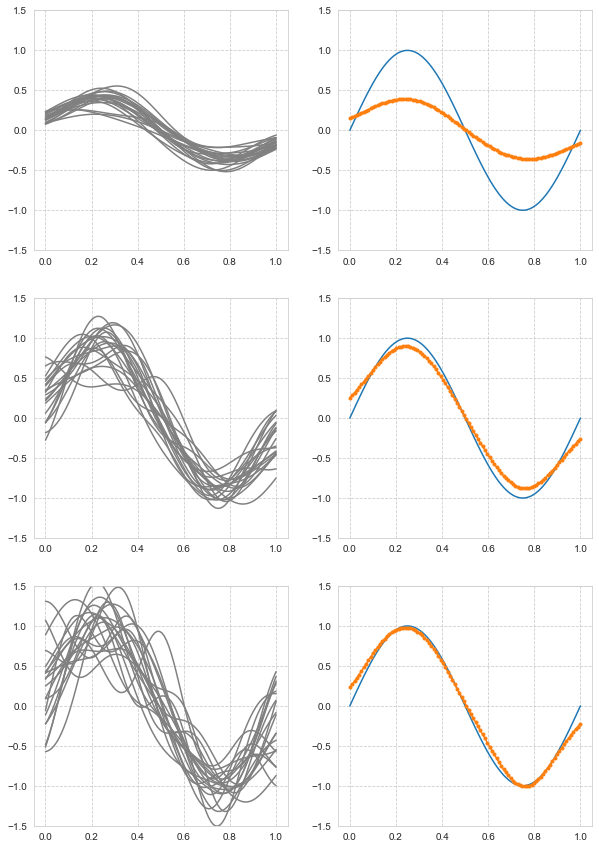

In [36]:
fig = plt.figure(figsize=(10, 15))
for k, lam in enumerate(exp([2.6, -0.31, -2.4])):
    y_mean = 0
    plt.subplot(3, 2, 2*k+1)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.5, 1.5)
    for i in range(20):
        y = 0
        x = x_array[i]
        t = t_array[i]
        w = np.linalg.inv(lam*np.identity(N) + phi[i, :, :].T @ phi[i, :, :]) @ phi[i, :, :].T @ t
        for j, mu in enumerate(np.linspace(-1, 2, M)):
            y += w[j] * exp(-(x_r-mu)**2 / (2*(sigma)**2))
        y_mean += y
        plt.plot(x_r, y, color='gray')
    y_mean /= 20
    plt.subplot(3, 2, 2*k+2)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.5, 1.5)
    plt.plot(x_r, t_r)
    plt.plot(x_r, y_mean, marker='.')
